In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Atlanta Police Department ![APD Logo](https://atlantapd.galls.com/photos/partners/atlantapd/logo.jpg)


The Atlanta Police Department provides Part 1 crime data at http://www.atlantapd.org/i-want-to/crime-data-downloads

A recent copy of the data file is stored in the cluster. <span style="color: red; font-weight: bold;">Please, do not copy this data file into your home directory!</span>

In [1]:
### Load libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
help(plt.legend)

Load data (don't change this if you're running the notebook on the cluster)

We have two files
- `/home/data/APD/COBRA083016_2015.xlsx` for 2015
- `/home/data/APD/COBRA083016.xlsx` from 2009 to current date

In [2]:
%%time
df = pd.read_excel('/home/data/APD/COBRA083016_2015.xlsx', sheetname='Query')

CPU times: user 11.1 s, sys: 25.5 ms, total: 11.1 s
Wall time: 11.2 s


In [3]:
df.shape

(30011, 23)

In [4]:
for c in df.columns:
    print(c)

MI_PRINX
offense_id
rpt_date
occur_date
occur_time
poss_date
poss_time
beat
apt_office_prefix
apt_office_num
location
MinOfucr
MinOfibr_code
dispo_code
MaxOfnum_victims
Shift
Avg Day
loc_type
UC2 Literal
neighborhood
npu
x
y


In [5]:
df[0:5]

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
206914,1371687,150562000,05/14/2013,05/14/2013,09:00:00,05/14/2013,11:30:00,205,NaN,NaN,...,NaN,1,Day,Tue,18.0,LARCENY-FROM VEHICLE,Woodfield,C,-84.40912,33.82308
207443,4346442,150010052,01/01/2015,12/31/2014,22:00:00,01/01/2015,00:07:00,512,NaN,NaN,...,NaN,1,Morn,Wed,NaN,LARCENY-FROM VEHICLE,Downtown,M,-84.39361,33.75246
207444,4346443,150010079,01/01/2015,01/01/2015,00:03:00,01/01/2015,00:03:00,606,NaN,3377,...,NaN,1,Morn,Thu,26.0,ROBBERY-PEDESTRIAN,Grant Park,W,-84.35917,33.73991
207445,4346444,150010151,01/01/2015,12/31/2014,23:45:00,01/01/2015,00:21:00,208,NaN,NaN,...,20,1,Morn,Thu,18.0,LARCENY-NON VEHICLE,Buckhead Forest,B,-84.37462,33.84564
207446,4346445,150010214,01/01/2015,01/01/2015,00:30:00,01/01/2015,01:05:00,407,1000,1009,...,NaN,2,Morn,Thu,26.0,AGG ASSAULT,Fairburn Mays,H,-84.50968,33.74349


In [6]:
df.describe()

,MI_PRINX,offense_id,beat,MinOfucr,MaxOfnum_victims,loc_type,x,y
count,3.001100e+04,3.001100e+04,30011.000000,30011.000000,30011.000000,26903.000000,30011.000000,30011.000000
mean,4.361347e+06,1.518675e+08,359.417813,594.219886,1.194695,21.109356,-84.408346,33.756058
std,1.931052e+04,1.029128e+06,169.563281,114.321851,0.799062,16.579831,0.046894,0.045981
min,1.371687e+06,1.500101e+08,101.000000,210.000000,0.000000,1.000000,-84.546070,33.637450
25%,4.353944e+06,1.510128e+08,208.000000,512.000000,1.000000,13.000000,-84.432445,33.729060
50%,4.361446e+06,1.518913e+08,401.000000,640.000000,1.000000,18.000000,-84.398210,33.756000
75%,4.368948e+06,1.527329e+08,505.000000,670.000000,1.000000,21.000000,-84.374420,33.781470
max,4.376451e+06,1.536580e+08,709.000000,730.000000,44.000000,99.000000,-84.290480,33.883250


In [7]:
df.offense_id.min(), df.offense_id.max()

(150010052, 153658045)

In [19]:
crime_summary = df.groupby(['UC2 Literal', 'Zone']).offense_id.count()

In [21]:
crime_summary.index

MultiIndex(levels=[[u'AGG ASSAULT', u'AUTO THEFT', u'BURGLARY-NONRES', u'BURGLARY-RESIDENCE', u'LARCENY-FROM VEHICLE', u'LARCENY-NON VEHICLE', u'RAPE', u'ROBBERY-COMMERCIAL', u'ROBBERY-PEDESTRIAN', u'ROBBERY-RESIDENCE'], [1, 2, 3, 4, 5, 6, 7]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9], [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5]],
           names=[u'UC2 Literal', u'Zone'])

In [22]:
crime_summary.reset_index().head()

,UC2 Literal,Zone,offense_id
0,AGG ASSAULT,1,523
1,AGG ASSAULT,2,137
2,AGG ASSAULT,3,587
3,AGG ASSAULT,4,457
4,AGG ASSAULT,5,225


In [16]:
df["Zone"] = df.beat // 100

In [17]:
df

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y,Zone
206914,1371687,150562000,05/14/2013,05/14/2013,09:00:00,05/14/2013,11:30:00,205,NaN,NaN,...,1,Day,Tue,18.0,LARCENY-FROM VEHICLE,Woodfield,C,-84.40912,33.82308,2
207443,4346442,150010052,01/01/2015,12/31/2014,22:00:00,01/01/2015,00:07:00,512,NaN,NaN,...,1,Morn,Wed,NaN,LARCENY-FROM VEHICLE,Downtown,M,-84.39361,33.75246,5
207444,4346443,150010079,01/01/2015,01/01/2015,00:03:00,01/01/2015,00:03:00,606,NaN,3377,...,1,Morn,Thu,26.0,ROBBERY-PEDESTRIAN,Grant Park,W,-84.35917,33.73991,6
207445,4346444,150010151,01/01/2015,12/31/2014,23:45:00,01/01/2015,00:21:00,208,NaN,NaN,...,1,Morn,Thu,18.0,LARCENY-NON VEHICLE,Buckhead Forest,B,-84.37462,33.84564,2
207446,4346445,150010214,01/01/2015,01/01/2015,00:30:00,01/01/2015,01:05:00,407,1000,1009,...,2,Morn,Thu,26.0,AGG ASSAULT,Fairburn Mays,H,-84.50968,33.74349,4
207447,4346446,150010359,01/01/2015,12/31/2014,21:00:00,01/01/2015,00:15:00,512,NaN,NaN,...,1,Eve,Wed,18.0,AUTO THEFT,Downtown,M,-84.39303,33.75094,5
207448,4346447,150010370,01/01/2015,12/31/2014,23:15:00,01/01/2015,01:47:00,505,NaN,NaN,...,1,Morn,Thu,13.0,LARCENY-FROM VEHICLE,Midtown,E,-84.38882,33.77511,5
207449,4346448,150010413,01/01/2015,12/31/2014,23:00:00,01/01/2015,02:00:00,303,NaN,NaN,...,3,Morn,Thu,13.0,LARCENY-FROM VEHICLE,Mechanicsville,V,-84.39903,33.73631,3
207450,4346449,150010417,01/01/2015,01/01/2015,02:00:00,01/01/2015,02:03:00,304,NaN,NaN,...,1,Morn,Thu,14.0,LARCENY-NON VEHICLE,Summerhill,V,-84.38686,33.74229,3
207451,4346450,150010419,01/01/2015,01/01/2015,01:50:00,01/01/2015,02:00:00,403,NaN,A,...,1,Morn,Thu,20.0,AGG ASSAULT,Oakland City,S,-84.42831,33.71759,4


## Exploring Dates

In [23]:
df[['offense_id', 'occur_date', 'occur_time', 'rpt_date']][1:10]

,offense_id,occur_date,occur_time,rpt_date
207443,150010052,12/31/2014,22:00:00,01/01/2015
207444,150010079,01/01/2015,00:03:00,01/01/2015
207445,150010151,12/31/2014,23:45:00,01/01/2015
207446,150010214,01/01/2015,00:30:00,01/01/2015
207447,150010359,12/31/2014,21:00:00,01/01/2015
207448,150010370,12/31/2014,23:15:00,01/01/2015
207449,150010413,12/31/2014,23:00:00,01/01/2015
207450,150010417,01/01/2015,02:00:00,01/01/2015
207451,150010419,01/01/2015,01:50:00,01/01/2015


Convert into date-time type

In [ ]:
df['occur_ts'] = pd.to_datetime(df.occur_date+' '+df.occur_time)

In [ ]:
#df[['offense_id', 'occur_date', 'occur_time', 'occur_ts', 'rpt_date']][1:10]

In [24]:
df['occur_ts'] = pd.to_datetime(df.occur_date+' '+df.occur_time)

In [25]:
df['occur_month'] = df['occur_ts'].map(lambda x: x.month)
df['occur_woy'] = df.occur_ts.dt.weekofyear

In [26]:
df.describe()

,MI_PRINX,offense_id,beat,MinOfucr,MaxOfnum_victims,loc_type,x,y,Zone,occur_month,occur_woy
count,3.001100e+04,3.001100e+04,30011.000000,30011.000000,30011.000000,26903.000000,30011.000000,30011.000000,30011.000000,29997.000000,29997.000000
mean,4.361347e+06,1.518675e+08,359.417813,594.219886,1.194695,21.109356,-84.408346,33.756058,3.527307,6.654399,27.453312
std,1.931052e+04,1.029128e+06,169.563281,114.321851,0.799062,16.579831,0.046894,0.045981,1.700308,3.365509,14.700785
min,1.371687e+06,1.500101e+08,101.000000,210.000000,0.000000,1.000000,-84.546070,33.637450,1.000000,1.000000,1.000000
25%,4.353944e+06,1.510128e+08,208.000000,512.000000,1.000000,13.000000,-84.432445,33.729060,2.000000,4.000000,15.000000
50%,4.361446e+06,1.518913e+08,401.000000,640.000000,1.000000,18.000000,-84.398210,33.756000,4.000000,7.000000,28.000000
75%,4.368948e+06,1.527329e+08,505.000000,670.000000,1.000000,21.000000,-84.374420,33.781470,5.000000,10.000000,40.000000
max,4.376451e+06,1.536580e+08,709.000000,730.000000,44.000000,99.000000,-84.290480,33.883250,7.000000,12.000000,53.000000


In [37]:
df.shape

(30011, 26)

In [38]:
df.columns

Index([         u'MI_PRINX',        u'offense_id',          u'rpt_date',
              u'occur_date',        u'occur_time',         u'poss_date',
               u'poss_time',              u'beat', u'apt_office_prefix',
          u'apt_office_num',          u'location',          u'MinOfucr',
           u'MinOfibr_code',        u'dispo_code',  u'MaxOfnum_victims',
                   u'Shift',           u'Avg Day',          u'loc_type',
             u'UC2 Literal',      u'neighborhood',               u'npu',
                       u'x',                 u'y',          u'occur_ts',
             u'occur_month',         u'occur_woy'],
      dtype='object')

In [49]:
df.iloc[9]

MI_PRINX                            4346450
offense_id                        150010419
rpt_date                         01/01/2015
occur_date                       01/01/2015
occur_time                         01:50:00
poss_date                        01/01/2015
poss_time                          02:00:00
beat                                    403
apt_office_prefix                       NaN
apt_office_num                            A
location             1231 CAMPBELLTON PL SW
MinOfucr                                430
MinOfibr_code                          1315
dispo_code                               10
MaxOfnum_victims                          1
Shift                                  Morn
Avg Day                                 Thu
loc_type                                 20
UC2 Literal                     AGG ASSAULT
neighborhood                   Oakland City
npu                                       S
x                                  -84.4283
y                               

In [45]:
resdf.index

MultiIndex(levels=[[u'AGG ASSAULT', u'AUTO THEFT', u'BURGLARY-NONRES', u'BURGLARY-RESIDENCE', u'LARCENY-FROM VEHICLE', u'LARCENY-NON VEHICLE', u'RAPE', u'ROBBERY-COMMERCIAL', u'ROBBERY-PEDESTRIAN', u'ROBBERY-RESIDENCE'], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 

In [48]:
resdf.loc[['AUTO_THEFT', 6]]

Series([], Name: offense_id, dtype: int64)

In [35]:
resdf = df.groupby(['UC2 Literal', 'occur_month']).offense_id.count()
resdf

UC2 Literal         occur_month
AGG ASSAULT         1.0            156
                    2.0            139
                    3.0            189
                    4.0            191
                    5.0            182
                    6.0            205
                    7.0            201
                    8.0            209
                    9.0            176
                    10.0           172
                    11.0           142
                    12.0           149
AUTO THEFT          1.0            351
                    2.0            279
                    3.0            359
                    4.0            332
                    5.0            408
                    6.0            452
                    7.0            396
                    8.0            405
                    9.0            334
                    10.0           369
                    11.0           262
                    12.0           284
BURGLARY-NONRES     1.0         

In [28]:
resdf['BURGLARY-RESIDENCE'].as_matrix()

array([357, 232, 303, 311, 375, 323, 316, 292, 298, 340, 340, 432])

In [ ]:
resdf['BURGLARY-RESIDENCE'].iloc(0)

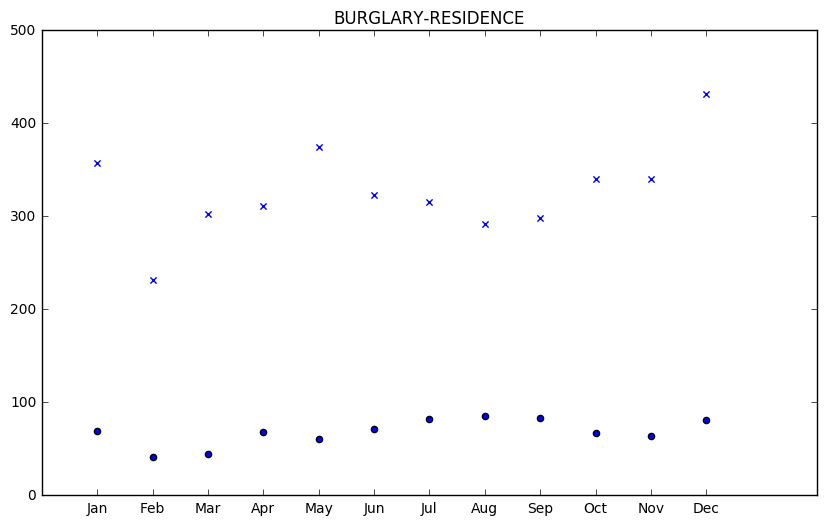

In [29]:
%matplotlib inline
fig = plt.figure(figsize=(10,6)) # 10inx10in
#plt.plot(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'])
plt.scatter(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'], marker='x')
plt.scatter(resdf['BURGLARY-NONRES'].index, resdf['BURGLARY-NONRES'], marker='o')

plt.ylim(0, 500)
plt.title('BURGLARY-RESIDENCE')
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.savefig('BurglaryResidence_over_month.svg')
x = 1

In [32]:
def getTheMonth(x):
    return x.month

df['occur_month'] = df['occur_ts'].map(getTheMonth)

In [30]:
df = pd.read_excel('/home/data/APD/COBRA083016_2015.xlsx', sheetname='Query')
df['occur_ts'] = pd.to_datetime(df.occur_date+' '+df.occur_time)
df['occur_month'] = df['occur_ts'].map(lambda x: x.month)
df['occur_woy'] = df.occur_ts.dt.weekofyear

''

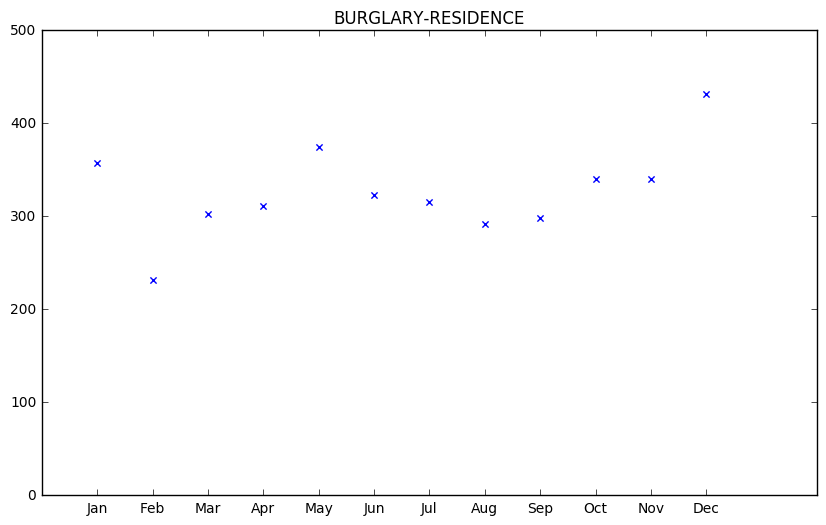

In [31]:
%matplotlib inline
resdf = df.groupby(['UC2 Literal', 'occur_month']).offense_id.count()
fig = plt.figure(figsize=(10,6))
plt.scatter(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'], marker='x')
plt.ylim(0, 500)
plt.title('BURGLARY-RESIDENCE')
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('quiz3-burglary-residence.png')

''

In [ ]:
plt.savefig('quiz3-burglary-residence.png')


# Part 1 - Observations from the data


# Part 2 - Seasonal Model

In [34]:
## load complete dataset
dff = pd.read_excel('/home/data/APD/COBRA083016.xlsx', sheetname='Query')

In [ ]:
dff.shape

In [ ]:
for evt in ['occur', 'poss']:
    dff['%s_ts'%evt] = pd.to_datetime(dff['%s_date'%evt]+' '+dff['%s_time'%evt])
dff['rpt_ts'] = pd.to_datetime(dff.rpt_date)

In [ ]:
', '.join(dff.columns)

In [ ]:
dff['occur_year'] = dff.occur_ts.dt.year
dff['occur_month'] = dff.occur_ts.dt.month
dff['occur_dayweek'] = dff.occur_ts.dt.dayofweek

### Crime per year
Let's look at the 

In [33]:
crime_year = dff[dff.occur_year.between(2009, 2015)].groupby(by=['UC2 Literal', 'occur_year']).offense_id.count()

NameError: name 'dff' is not defined

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(40,30))
crime_types = crime_year.index.levels[0]
years = crime_year.index.levels[1]
for c in range(len(crime_types)):
    y_max = max(crime_year.loc[crime_types[c]])
    
    plt.subplot(4,3,c+1)
    plt.hlines(crime_year.loc[crime_types[c]].iloc[-1]*100/y_max, years[0], years[-1], linestyles="dashed", color="r")
    plt.bar(crime_year.loc[crime_types[c]].index, crime_year.loc[crime_types[c]]*100/y_max, label=crime_types[c], alpha=0.5)
    ##plt.legend()
    plt.ylim(0, 100)
    plt.xticks(years+0.4, [str(int(y)) for y in years], rotation=0, fontsize=24)
    plt.yticks([0,20,40,60,80,100], ['0%','20%','40%','60%','80%','100%'], fontsize=24)
    plt.title(crime_types[c], fontsize=30)
    None

Let's look at residential burglary.

In [ ]:
c = 3
crime_types[c]

In [ ]:
crime_year_month = dff[dff.occur_year.between(2009, 2015)].groupby(by=['UC2 Literal', 'occur_year', 'occur_month']).offense_id.count()

In [ ]:
c = 3 ## 'BURGLARY-RESIDENCE'
resburglaries = crime_year_month.loc[crime_types[c]]
fig = plt.figure(figsize=(20,10))
for y in years:
    plt.plot(resburglaries.loc[y].index, resburglaries.loc[y], label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s"%crime_types[c], fontsize=20)
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
None

Normalized over the annual average

In [ ]:
c = 3 ## 'BURGLARY-RESIDENCE'
fig = plt.figure(figsize=(20,10))
for y in years:
    avg = resburglaries.loc[y].mean()
    plt.hlines(avg, 1, 13, linestyle='dashed')
    plt.plot(resburglaries.loc[y].index, resburglaries.loc[y], label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s (with annuale averages)"%crime_types[c], fontsize=20)
plt.xticks(list(range(1,13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
None

In [ ]:
c = 3 ## 'BURGLARY-RESIDENCE'
fig = plt.figure(figsize=(20,10))
for y in years:
    avg = resburglaries.loc[y].mean()
    std = resburglaries.loc[y].std()
    ##plt.hlines(avg, 1, 13, linestyle='dashed')
    plt.plot(resburglaries.loc[y].index, (resburglaries.loc[y]-avg)/std, label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s (normalized)"%crime_types[c], fontsize=20)
plt.xticks(list(range(1,13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
plt.ylabel("Standard deviations $\sigma_y$")
None

In [ ]:
seasonal_adjust = resburglaries.reset_index().groupby(by=['occur_month']).offense_id.agg('mean')

### Fitting the regression line
Suppose there are $n$ data points {{math|{(''x<sub>i</sub>'', ''y<sub>i</sub>''), ''i'' {{=}} 1, ..., ''n''}.}} The function that describes x and y is:

$$y_i = \alpha + \beta x_i + \varepsilon_i.$$

The goal is to find the equation of the straight line

$$y = \alpha + \beta x,$$

which would provide a "best" fit for the data points. Here the "best" will be understood as in the [[Ordinary least squares|least-squares]] approach: a line that minimizes the sum of squared residuals of the linear regression model. In other words, {{mvar|α}} (the {{mvar|y}}-intercept) and {{mvar|β}} (the slope) solve the following minimization problem:

$$\text{Find }\min_{\alpha,\,\beta} Q(\alpha, \beta), \qquad \text{for } Q(\alpha, \beta) = \sum_{i=1}^n\varepsilon_i^{\,2} = \sum_{i=1}^n (y_i - \alpha - \beta x_i)^2\ $$

By using either [[calculus]], the geometry of [[inner product space]]s, or simply expanding to get a quadratic expression in {{mvar|α}} and {{mvar|β}}, it can be shown that the values of {{mvar|α}} and {{mvar|β}} that minimize the objective function {{mvar|Q}}<ref>Kenney, J. F. and Keeping, E. S. (1962) "Linear Regression and Correlation." Ch. 15 in ''Mathematics of Statistics'', Pt. 1, 3rd ed. Princeton, NJ: Van Nostrand, pp. 252–285</ref> are

: <math>\begin{align}
  \hat\beta &= \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) }{ \sum_{i=1}^n (x_i - \bar{x})^2 } \\[6pt]
            &= \frac{ \sum_{i=1}^{n} (x_i y_i - x_i \bar{y} - \bar{x} y_i + \bar{x} \bar{y})} { \sum_{i=1}^n (x_i^2 - 2 x_i \bar{x} + \bar{x}^2) } \\[6pt]
            &= \frac{ \sum_{i=1}^{n} (x_i y_i) - \bar{y} \sum_{i=1}^{n}  x_i  - \bar{x} \sum_{i=1}^{n} y_i + n  \bar{x} \bar{y}} { \sum_{i=1}^n (x_i^2) - 2 \bar{x}  \sum_{i=1}^n  x_i  + n \bar{x}^2 } \\[6pt]
            &= \frac{ \frac{1}{n} \sum_{i=1}^{n} x_i y_i - \bar{x} \bar{y} }{ \frac{1}{n}\sum_{i=1}^n {x_i^2} -   \overline{x}^2 } \\[6pt]
            &= \frac{ \overline{xy} - \bar{x}\bar{y} }{ \overline{x^2} - \bar{x}^2 } = \frac{ \operatorname{Cov}[x, y] }{ \operatorname{Var}[x] } \\
            &= r_{xy} \frac{s_y}{s_x}, \\[6pt]
 \hat\alpha & = \bar{y} - \hat\beta\,\bar{x},
\end{align}</math>

where {{math|''r<sub>xy</sub>''}} is the [[Correlation#Pearson's product-moment coefficient|sample correlation coefficient]] between {{mvar|x}} and {{mvar|y}}; and {{math|''s<sub>x</sub>''}} and {{math|''s<sub>y</sub>''}} are the [[sample standard deviation]] of {{mvar|x}} and {{mvar|y}}. A horizontal bar over a quantity indicates the average value of that quantity. For example:

:<math>\overline{xy} = \frac{1}{n} \sum_{i=1}^n x_i y_i.</math>

Substituting the above expressions for <math>\hat{\alpha}</math> and <math>\hat{\beta}</math> into

: <math>f = \hat{\alpha} + \hat{\beta} x,</math>

yields

: <math>\frac{ f - \bar{y}}{s_y} = r_{xy} \frac{ x - \bar{x}}{s_x}  </math>

This shows that {{math|''r<sub>xy</sub>''}} is the slope of the regression line of the [[Standard score|standardized]] data points (and that this line passes through the origin).

It is sometimes useful to calculate {{math|''r<sub>xy</sub>''}} from the data independently using this equation:

:<math>r_{xy} = \frac{ \overline{xy} - \bar{x}\bar{y} }{ \sqrt{ \left(\overline{x^2} - \bar{x}^2\right)\left(\overline{y^2} - \bar{y}^2\right)} } </math>

The [[coefficient of determination]] (R squared) is equal to <math>r_{xy}^2</math> when the model is linear with a single independent variable. See [[Correlation#Pearson's product-moment coefficient|sample correlation coefficient]] for additional details.

===Linear regression without the intercept term===
Sometimes it is appropriate to force the regression line to pass through the origin, because {{mvar|x}} and {{mvar|y}} are assumed to be proportional. For the model without the intercept term, {{math|''y'' {{=}} ''βx''}}, the OLS estimator for {{mvar|β}} simplifies to

: <math>\hat{\beta} = \frac{ \sum_{i=1}^n x_i y_i }{ \sum_{i=1}^n x_i^2 } = \frac{\overline{x y}}{\overline{x^2}} </math>

Substituting {{math|(''x'' − ''h'', ''y'' − ''k'')}} in place of {{math|(''x'', ''y'')}} gives the regression through {{math|(''h'', ''k'')}}:

: <math>\begin{align}
  \hat\beta &= \frac{\overline{(x - h) (y - k)}}{\overline{(x - h)^2}} \\[6pt]
            &= \frac{\overline{x y} + k \bar{x} - h \bar{y} - h k }{\overline{x^2} - 2 h \bar{x} + h^2} \\[6pt]
            &= \frac{\overline{x y} - \bar{x} \bar{y} + (\bar{x} - h)(\bar{y} - k)}{\overline{x^2} - \bar{x}^2 + (\bar{x} - h)^2} \\[6pt]
            &= \frac{\operatorname{Cov}[x,y] + (\bar{x} - h)(\bar{y}-k)}{\operatorname{Var}[x] + (\bar{x} - h)^2}
\end{align}</math>

The last form above demonstrates how moving the line away from the center of mass of the data points affects the slope.


In [ ]:
### in case we want to save a DataFrame
#writer = pd.ExcelWriter('myresults.xlsx')
#df.to_excel(writer,'Results')
#writer.save()

In [ ]:
resdf